# Big Data Analytics with Python
What we will cover:

1. Introductions
    * Python Basics
    * Introduction to PySpark
2. Data Frame Essentials: 
    * read
    * write
    * validate and explore
    * Clean
    * Manipulate
    * Join
    * Aggregate
3. Introduction to Spark MLlib
4. Introduction to Classification in MLlib
5. Model Selection and Tuning in MLlib
6. Natural Language Processing in MLlib
7. Regression in MLlib
8. Clustering in MLlib
9. Pattern Mining in Mlib


<span style="color:blue;">Requirements</span>

- Python Basics  
- How to create functions  
- Creating and working with dictionaries  
- Working with lists  
- Comprehensions  

# Python vs PySpark Commands
## *Python*


### Create a Pandas dataframe

In Python, if we want to create a dataframe, we need to import a library. Pandas is the most common library used for this. Let's create one now. 

In [2]:
import pandas as pd 
  
# initialize list of lists 
data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Name', 'Age']) 
df

,Name,Age
0,tom,10
1,nick,15
2,juli,14


## Display the dataframe and it's properties

In [4]:
df.head(5)

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [5]:
# Get a list of columns
df.columns

Index(['Name', 'Age'], dtype='object')

In [6]:
# How many rows are in the dataframe?
len(df)

3

## Read in data

In [7]:
path = "PySpark Dataframe Essentials/Datasets/students.csv"
df = pd.read_csv(path) 
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Aggregate Data

In [8]:
df.groupby('gender').agg({'math score': ['mean', 'min', 'max']})

math score         
             mean min  max
gender                    
female  63.633205   0  100
male    68.728216  27  100

## *PySpark*

<span style="color:blue;">What is *Spark*?</span>

Apache Spark is a lightning-fast, open-source data-processing engine for machine learning and AI applications, backed by the largest open-source community in big data. [-IBM](https://www.ibm.com/think/topics/apache-spark)

<span style="color:blue;">What is PySpark?</span>

* Apache Spark
    * Framework: open-source cluster-computing
    * Benefits: speed, ease of use, and streaming analytics
* Python
    * Also open-sourced
    * Benefits: general-purpose, high-level programming language
    * Provides a wide range of libraries and is majorly used for Machine Learning and Real-Time Streaming Analytics
* PySpark is therefore a Python API for Spark that lets you harness the simplicity of Python and the power of Apache Spark in order to tame Big Data and perform massive distributed processing over resilient sets of data. 

<span style="color:blue;">How is PySpark Different than Python?</span>

* Runs on a cluster
* Certain processes will look different specially when you get in the machine learning libraries
* PySpark does not use indexing
* All objects in PySpark are immutable
* Error message are much less informative
* Many of the libraries you are used to using in Python won’t function in PySpark

<span style="color:blue;">What is Cluster Computing?</span>

A set of connected computers.

Benefits:
* Faster processing speed
* Larger storage capacity
* Better data integrity
* Superior reliability
* Wider availability of resources 


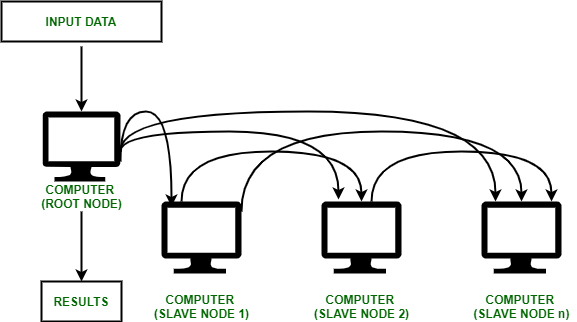
source: https://www.geeksforgeeks.org/computer-networks/an-overview-of-cluster-computing/


<span style="color:blue;">Spark Life Story</span>

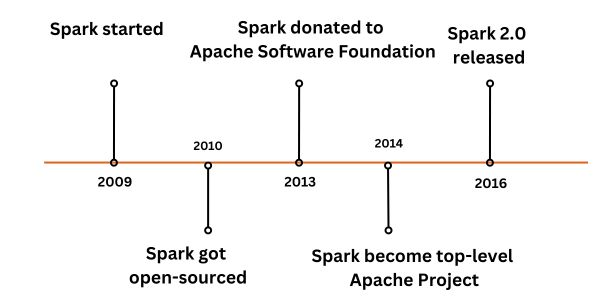
source: https://www.naukri.com/code360/library/introduction-to-apache-spark


<span style="color:blue;">How to install *PySpark*?</span>

* Mac & Linux
```bach
wget https://downloads.apache.org/spark/spark-4.0.1/spark-4.0.1-bin-hadoop3.tgz
tar xvf spark-4.0.1-bin-hadoop3.tgz
sudo mv spark-4.0.1-bin-hadoop3 /opt/spark
```

* [Windows](https://sparkbyexamples.com/pyspark/install-pyspark-in-anaconda-jupyter-notebook/)

* If you are not a sudoer, install the light Python Spark using `pip`
```python
python3 -m venv pyspark_env
source pyspark_env/bin/activate
pip install pyspark
```

In [3]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
# May take awhile locally
spark = SparkSession.builder.appName("PySpark")\
    .getOrCreate()
spark

ModuleNotFoundError: No module named 'findspark'

### Create a Spark dataframe

In PySpark you need to create a Spark session first before you do anything. Then the createdataframe is inherent in session.

In [4]:
# initialize list of lists (same as in python)
data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# Create the pandas DataFrame 
df = spark.createDataFrame(data,['Name', 'Age']) 
df

NameError: name 'spark' is not defined

## Display Dataframe and it's properties

In [10]:
df.show()

+----+---+
|Name|Age|
+----+---+
| tom| 10|
|nick| 15|
|juli| 14|
+----+---+



In [11]:
# This is closer to pandas df.head()
df.toPandas()

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [12]:
# View column names
# This is the same
df.columns

['Name', 'Age']

In [13]:
# How many rows are in the dataframe
df.count()

3

## Read in data

In [24]:
path = "PySpark Dataframe Essentials/Datasets/students.csv"
df = spark.read.csv(path,header=True)
df.toPandas()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Aggregate Data

This is method is very similar to pandas but you can only do one metric at a time

In [20]:
df.groupBy("gender").agg({'math score':'mean'}).show()

+------+------------------+
|gender|   avg(math score)|
+------+------------------+
|female|63.633204633204635|
|  male| 68.72821576763485|
+------+------------------+



For more than one aggreate... use this

In [17]:
from pyspark.sql import functions as F
df.groupBy("gender").\
    agg(F.min("math score"), F.max("math score"), F.avg("math score"))\
        .show()

+------+---------------+---------------+------------------+
|gender|min(math score)|max(math score)|   avg(math score)|
+------+---------------+---------------+------------------+
|female|              0|             99|63.633204633204635|
|  male|            100|             99| 68.72821576763485|
+------+---------------+---------------+------------------+



## Sparks Immutability

Spark DataFrame's are built on top of RDDs which are immutable in nature, hence Data frames are immutable in nature as well.

So if you make a change to a dataframe like adding a column or changing any of the values in the dataframe using the same naming convention, it will generate a new dataframe (with a new unique ID) instead of updating the existing data frame.

In [ ]:
# Let's fetch the id of our dataframe we created above
df.rdd.id()

47

In [ ]:
# Even if we duplicate the dataframe, the ID remains the same
df2 = df
df2.rdd.id()

47

In [ ]:
# It's not until we change the df in some way, that the ID changes
df = df.withColumn('new_col', df['math score'] * 2)
df.rdd.id()

51

## Spark's Lazy Comuptation

What does that mean exactly?

As the name itself indicates its definition, lazy evaluation in Spark means that the execution will not start until it absolutuley HAS to. 

Let's look at an example. 

In [ ]:
# These kinds of commands won't actually be run...
df = df.withColumn('new_col', df['math score'] * 2)

In [ ]:
# Until we executute a command like this
collect = df.collect()

In [ ]:
# Or this
print(df)

DataFrame[gender: string, race/ethnicity: string, parental level of education: string, lunch: string, test preparation course: string, math score: string, reading score: string, writing score: string, new_col: double]


In [9]:
spark.stop()